## Métodos de Otimização: Métodos de procura multidimensional

### Steepest Descent - Diferenças finitas

__Imports:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import time
name = 'Steepest Descent' 
Start = time.time()

__Função Avaliada:__

In [2]:
x=np.zeros(2 , dtype = 'float')
G =np.zeros(2 , dtype = 'float')

def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

__Método:__

In [3]:
def grad(x,countFunc):
    epsilon = 1.e-10
    nFunc = 5; Qvar = 2
    
    for i in range(0,len(x)):
        xtmp=x.copy()
        xtmp[i]=xtmp[i]+epsilon
        F_xtmp, countFunc = f(xtmp,nFunc,Qvar,countFunc)
        F_x, countFunc = f(x,nFunc,Qvar,countFunc)
        G[i]=(F_xtmp-F_x)/epsilon
    
    return G,countFunc

In [4]:
nFunc = 5; Qvar = 2
alfa=0.1; kmax=50; k=0; countFunc=0

xold =np.zeros(2 , dtype = 'float')
xnew =np.zeros(2 , dtype = 'float')
xold[0]=3; xold[1]=2; F0,countFunc = f(xold,nFunc,Qvar,countFunc)
layout = "{0:.5f}"
fHist = []
print(layout.format(xold[0])+" "+layout.format(xold[1])+" "+layout.format(F0))
fHist.append(F0)

while k < kmax:
    k += 1
    
    # Calculo Gradiente
    G,countFunc = grad(xold,countFunc)
    
    # Processo iterativo
    xnew=xold-alfa*G
    
    #Atualiza xold
    xold = xnew.copy()
    
    #Calculo da função
    F,countFunc = f(xnew,nFunc,Qvar,countFunc)
    print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))
    fHist.append(F)

3.00000 2.00000 0.64453
3.19886 2.07760 0.43709
3.16734 2.10823 0.42261
3.16532 2.13759 0.41475
3.16095 2.16138 0.40940
3.15764 2.18110 0.40575
3.15486 2.19738 0.40326
3.15257 2.21084 0.40156
3.15067 2.22196 0.40040
3.14910 2.23116 0.39960
3.14780 2.23875 0.39906
3.14673 2.24504 0.39869
3.14584 2.25023 0.39843
3.14510 2.25452 0.39826
3.14450 2.25807 0.39814
3.14399 2.26100 0.39806
3.14358 2.26343 0.39801
3.14323 2.26543 0.39797
3.14295 2.26709 0.39794
3.14271 2.26846 0.39793
3.14252 2.26959 0.39791
3.14236 2.27053 0.39791
3.14223 2.27131 0.39790
3.14212 2.27194 0.39790
3.14203 2.27247 0.39789
3.14195 2.27291 0.39789
3.14189 2.27327 0.39789
3.14184 2.27357 0.39789
3.14180 2.27382 0.39789
3.14176 2.27402 0.39789
3.14173 2.27419 0.39789
3.14171 2.27433 0.39789
3.14169 2.27445 0.39789
3.14167 2.27454 0.39789
3.14166 2.27462 0.39789
3.14165 2.27469 0.39789
3.14164 2.27474 0.39789
3.14163 2.27479 0.39789
3.14163 2.27483 0.39789
3.14162 2.27486 0.39789
3.14161 2.27488 0.39789
3.14161 2.27490 

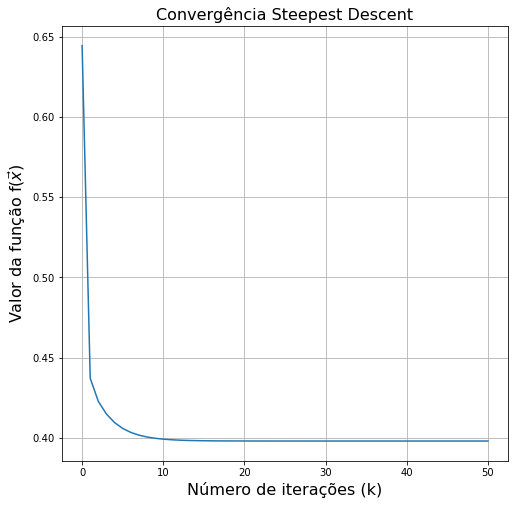

In [5]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k+1),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [6]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  251
Tempo de Execução = 4.509804725646973 s
